In [26]:
import seaborn as sns
import pandas as pd


def load_accidents(file_name):
    data = pd.read_csv(file_name, dtype = {'lon': float, 'lat':float})
    data = data.dropna(subset=['lon', 'lat', 'age', 'gravite accident'])
    data = data[ (data['lon'] != 0) & (data['lat'] != 0) ]
    return data

def get_age(row):
    x, y = map(int, row.split('-'))
    return (x+y)/2


file_name = 'accidents-velos.csv'
data_set = load_accidents(file_name)

/var/folders/56/h9j_6ts56x7_vx0b4k9383cm0000gn/T/ipykernel_36125/521495456.py:6: DtypeWarning: Columns (5,6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_name, dtype = {'lon': float, 'lat':float})


In [27]:
data_set['mean_age'] = data_set['age'].apply(get_age)
data_set = data_set[ data_set['mean_age'] < 100]

<Axes: xlabel='mean_age', ylabel='Count'>

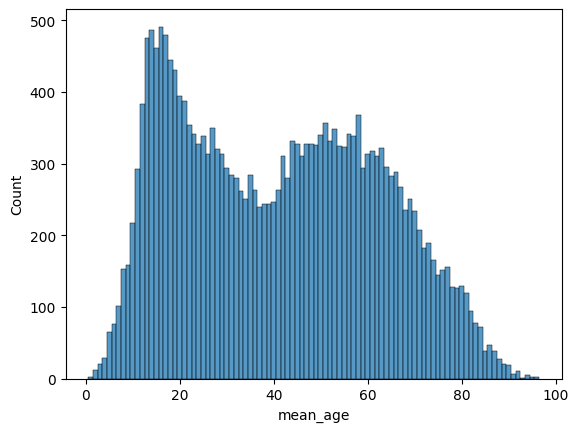

In [28]:
import seaborn as sns

sns.histplot(data=data_set, x="mean_age", binwidth=1)

<Axes: xlabel='sexe', ylabel='count'>

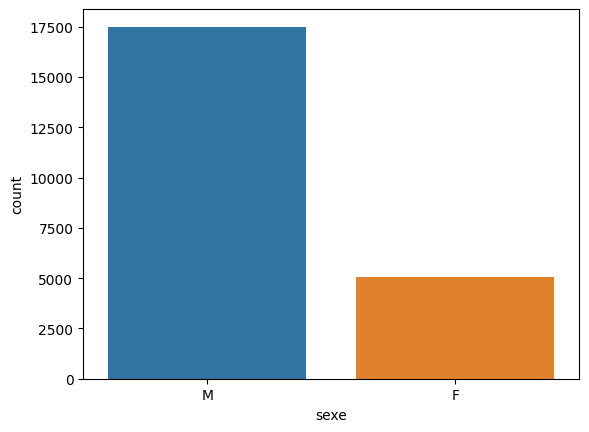

In [30]:
sns.countplot(x=data_set["sexe"])

[Text(0, 0, '1 - Blessé léger'),
 Text(1, 0, '2 - Blessé hospitalisé'),
 Text(2, 0, '3 - Tué'),
 Text(3, 0, '0 - Indemne')]

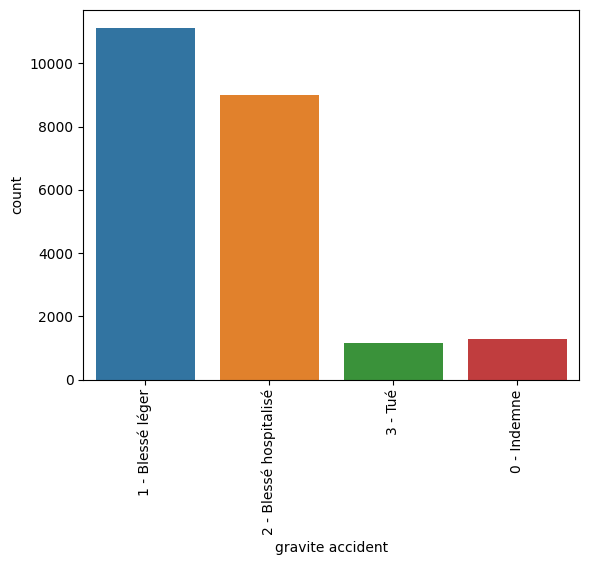

In [31]:
g = sns.countplot(x=data_set["gravite accident"])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'Promenade - loisirs'),
 Text(1, 0, 'Utilisation professionnelle'),
 Text(2, 0, 'Courses - achats'),
 Text(3, 0, 'Domicile - travail'),
 Text(4, 0, 'Domicile - école'),
 Text(5, 0, 'Autre')]

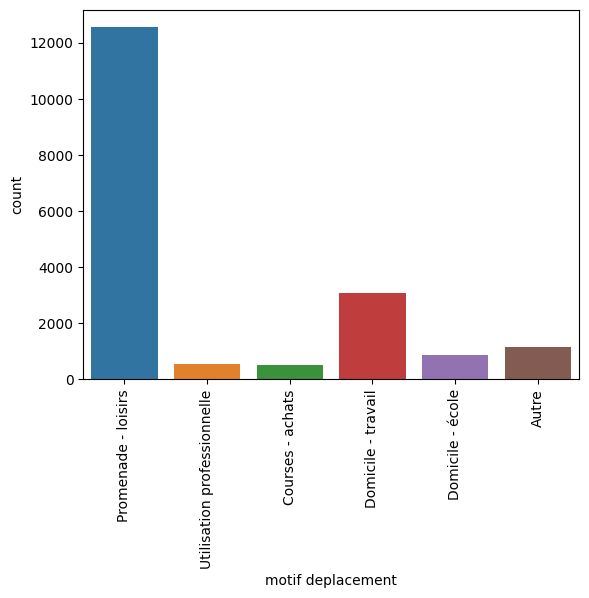

In [20]:
g = sns.countplot(x = data_set['motif deplacement'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

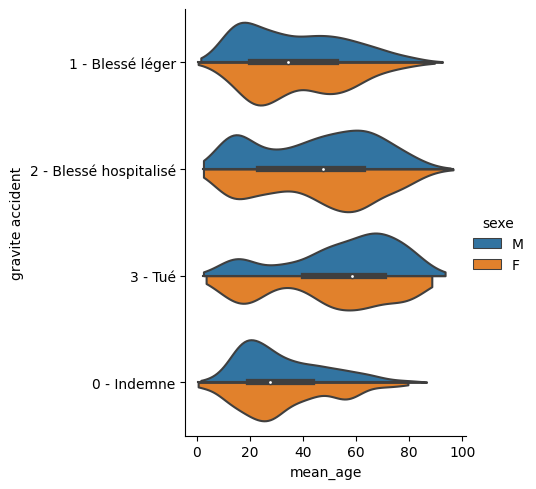

In [40]:
sns.catplot(
    data=data_set, x="mean_age", y="gravite accident", hue="sexe",
    kind="violin", bw=.25, cut=0, split=True,
)

In [35]:
sum(data_set['gravite accident'].isna())

0

<Axes: xlabel='count', ylabel='existence securite'>

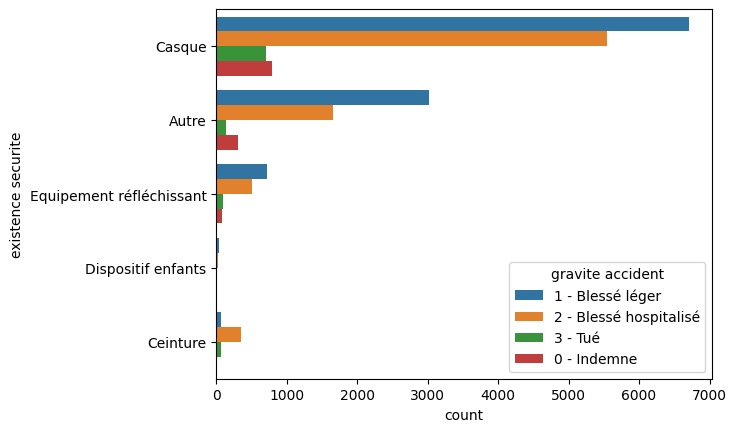

In [41]:
sns.countplot(data=data_set, y="existence securite", hue="gravite accident")

[Text(0, 0, 'Autre'),
 Text(1, 0, 'Casque'),
 Text(2, 0, 'Equipement réfléchissant'),
 Text(3, 0, 'Ceinture'),
 Text(4, 0, 'Dispositif enfants')]

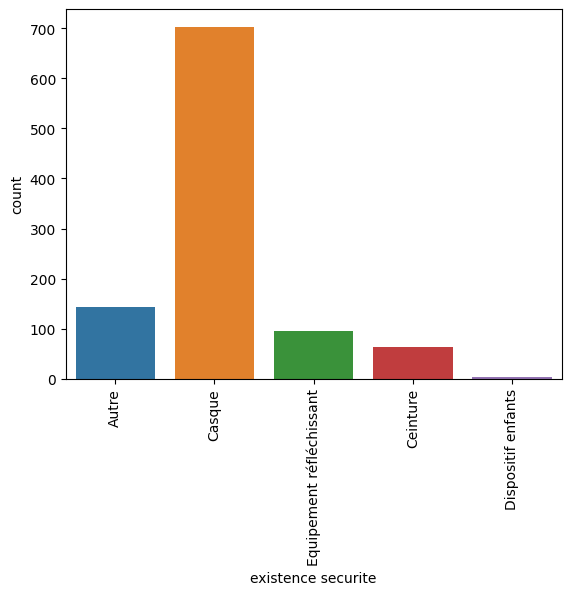

In [43]:
g = sns.countplot(x = data_set[ data_set['gravite accident'] == '3 - Tué' ]['existence securite'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
factors = ['en agglomeration', 'type intersection']